In [18]:
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
%matplotlib inline

In [27]:
def line(ax):
    df = 10
    dphi = 0.05
    X = np.linspace(0, 50, num=500)
    Y = np.exp(-X/df) * np.sin(X)
    Z = np.exp(-X/(1.5*df)) * np.cos((X-dphi*X))

    sampling_rate = 100
    y_smpl_x = X[::sampling_rate]
    y_smpl_y = Y[::sampling_rate]
    y_err = np.random.normal(0.3, 0.3, size=y_smpl_y.shape)
    z_smpl_x = X[25::sampling_rate]
    z_smpl_y = Z[25::sampling_rate]
    z_err = np.random.normal(0.3, 0.3, size=z_smpl_y.shape)
    
    Y_lines = ax.plot(X, Y, '--', label='Y(X)')
    Z_lines = ax.plot(X, Z, '-', label='Z(X)')
    cy = Y_lines[0].get_color()
    cz = Z_lines[0].get_color()

    ax.errorbar(y_smpl_x, y_smpl_y, yerr=y_err, ls='', marker='o', color=cy, capsize=3, label='Y samples')
    ax.errorbar(z_smpl_x, z_smpl_y, yerr=z_err, ls='', marker='o', color=cz, capsize=3, label='Z samples')
    ax.set_xlabel('X')
    ax.set_ylabel('Y(X), Z(X)')
    ax.set_title('Dampening with dampening factor 10')
    ax.legend(loc=4)

In [28]:
def radial(ax):
    theta = np.linspace(-np.pi, np.pi, num=200)
    R1 = 1 + np.cos(theta)
    R2 = np.cos(theta**2)
    
    ax.plot(theta, R1)
    ax.plot(theta, R2)
    ax.set_rticks([0.5, 1, 1.5])
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi/2)

In [29]:
def bar(ax):
    rain = np.array([34, 26, 23, 15, 10, 3, 2, 4, 15, 19, 30, 34])
    rain_err = np.random.uniform(2, 5, size=12)

    happiness = 100. / rain
    happ_err = happiness * rain_err / rain

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    width = 0.4
    indeces = np.arange(12)

    rects1 = ax.bar(indeces, rain, width, yerr=rain_err)
    ax.set_ylim(0, None)
    ax.set_ylabel(r'rainfall [mm]')

    ax2 = ax.twinx()
    rects2 = ax2.bar(indeces+width, happiness, width, yerr=happ_err, color='orange')
    ax2.set_ylim(0, None)
    ax2.set_ylabel(r'happiness [%]')

    ax2.legend([rects1[0], rects2[0]], ['rain', 'happiness'], loc='upper left')

    ax.set_xticks(indeces + width/2.)
    ax.set_xticklabels(months, rotation=60)

In [30]:
def make_plot(fig):
    gs = gridspec.GridSpec(2,2, hspace=0.4, wspace=0.3)
    
    ax1 = fig.add_subplot(gs[0, :])
    line(ax1)
    ax2 = fig.add_subplot(gs[1, 0], projection='polar')
    radial(ax2)
    ax3 = fig.add_subplot(gs[1, 1])
    bar(ax3)

When working with pgf plots it is important to note, that the size of the plot when exporting will be the size of the plot in the pdf. 

To choose the right size I like to use `pint` to be able to use `cm` as a unit, which I then can convert to `inches`, which is what matplotlib expects.

In [31]:
import pint

ureg = pint.UnitRegistry()
w = (18*ureg.cm).to(ureg.inches).m

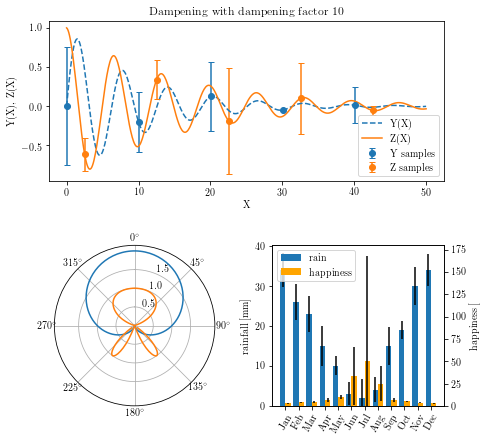

In [32]:
fig = plt.figure(figsize=(w, w))
make_plot(fig)

In [34]:
fig.savefig('awsome_plot.png')
fig.savefig('awsome_plot.pdf')
fig.savefig('awsome_plot.pgf')
fig.savefig('awsome_plot.svg')

Now lets put this into a latex document:

In [11]:
hide_me

from pygments import highlight
from pygments.lexers import TexLexer
from pygments.formatters import HtmlFormatter
from IPython.core.display import display, HTML

with open('example.tex', 'r') as f:
    code=f.read()

formatter = HtmlFormatter()
display(HTML('<style type="text/css">{}</style>    {}'
             .format(formatter.get_style_defs('.highlight'), 
                     highlight(code, TexLexer(), formatter))))

In [35]:
%%capture
!pdflatex example.tex

In [36]:
latex_custom_preamble = {
    "pgf.rcfonts": False,
    "font.family": "serif",
    "text.usetex": True,
}
mpl.rcParams.update(latex_custom_preamble)

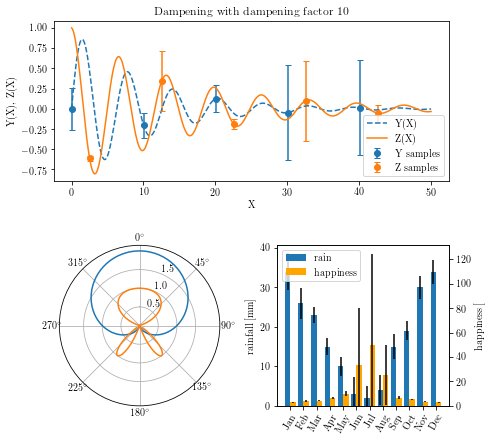

In [37]:
fig = plt.figure(figsize=(w, w))
make_plot(fig)

In [38]:
fig.savefig('awsome_plot.png')
fig.savefig('awsome_plot.pdf')
fig.savefig('awsome_plot.pgf')
fig.savefig('awsome_plot.svg')

In [39]:
%%capture
!pdflatex example.tex